In [1]:
# Import required Libraries
import pandas as pd
import os
from pandas import json_normalize
import json
import requests
from IPython.display import JSON

### Weather Functions

In [3]:
# Weather API Fetch Function
def world_weather_fetch(query):
    
        # Set Key
        weather_key = os.environ['weather_api_key']
        
        # Set Parameters for API
        weather_url = "http://api.worldweatheronline.com/premium/v1/weather.ashx?"
        location = query
        weather_response = requests.get(weather_url,params={
                                                  'q':location,
                                                  'date':'2019-01-01',
                                                  'fx':'no',
                                                  'cc':'no',
                                                  'mca':'yes',
                                                  'format':'json',
                                                  'key':weather_key})
        
        # Call API and direct returned information
        weather_result = weather_response.json()
        df_weather = json_normalize(weather_result)
        return weather_result, df_weather

In [4]:
# Function to Call Weather API Function through loop and then collect/compile data
def compile_weather_data(string_list):
    
    columns=['avgRainDays','avgDryDays','avgCloud','avgSnowDays']
    
    # retrieve 1st location in string_list as dataframe
    init_result,init_data = world_weather_fetch(string_list[0])
    init_data = json_normalize(data=init_data['data.ClimateAverages'][0][0]['month'])
    init_data[columns] = init_data[columns].apply(pd.to_numeric)
    base_data = init_data[columns]
    
    # Loop through list of locations and collect API data
    for i in string_list[1:]:
        result,dataframe = world_weather_fetch(i)
        weather_dataframe = json_normalize(data=dataframe['data.ClimateAverages'][0][0]['month'])
        base_data[columns] = base_data[columns] + weather_dataframe[columns].apply(pd.to_numeric)
        
    # Calculate Average of each column row based on number of items in string_list
    base_data = base_data/len(string_list)
    
    return init_data,base_data

### Compile Weather Data

In [11]:
# Import Early Flight Data list for Weather API Queries
import pickle
early = open('./Data/most_freq_early_flight_locations_2019','rb')
most_frequently_early = pickle.load(early)
early.close()
most_frequently_early.sort()

# Early Data
init_early,base_early = compile_weather_data(most_frequently_early)
init_early.drop(['avgRainDays','avgDryDays','avgCloud','avgSnowDays'], axis=1, inplace=True)
base_early = base_early.round(decimals=0)
early_data = pd.merge(init_early,base_early,how='outer',left_index=True,right_index=True)
weather_data_early = early_data[['name','avgRainDays','avgDryDays','avgCloud','avgSnowDays']]

# Export results of API call
sample_file = './Data/weather_early_flight_data'
sample_outfile = open(sample_file,'wb')
pickle.dump(weather_data_early,sample_outfile)
sample_outfile.close()

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Import Delayed Flight Data list for Weather API Queries
import pickle
late = open('./Data/most_freq_delayed_flight_locations_2019','rb')
most_frequently_delayed = pickle.load(late)
late.close()
most_frequently_delayed.sort()

# Delayed Data
init_delay,base_delay = compile_weather_data(most_frequently_delayed)
init_delay.drop(['avgRainDays','avgDryDays','avgCloud','avgSnowDays'], axis=1, inplace=True)
base_delay = base_delay.round(decimals=0)
delay_data = pd.merge(init_delay,base_delay,how='outer',left_index=True,right_index=True)
weather_data_delayed = delay_data[['name','avgRainDays','avgDryDays','avgCloud','avgSnowDays']]

# Export results from API call
sample_file = './Data/weather_delay_flight_data'
sample_outfile = open(sample_file,'wb')
pickle.dump(weather_data_delayed,sample_outfile)
sample_outfile.close()

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
# Retrieve Early Weather Data
import pickle
early = open('./Data/weather_early_flight_data','rb')
weather_data_early = pickle.load(early)
late.close()
weather_data_early

,name,avgRainDays,avgDryDays,avgCloud,avgSnowDays
0,January,7.0,21.0,40.0,4.0
1,February,7.0,18.0,42.0,4.0
2,March,10.0,19.0,39.0,2.0
3,April,10.0,18.0,35.0,1.0
4,May,11.0,17.0,32.0,0.0
5,June,10.0,17.0,25.0,0.0
6,July,12.0,17.0,23.0,0.0
7,August,11.0,17.0,23.0,0.0
8,September,9.0,19.0,25.0,0.0
9,October,8.0,21.0,28.0,0.0


In [14]:
# Retrieve Delayed Weather Data
import pickle
late = open('./Data/weather_delay_flight_data','rb')
weather_data_delayed = pickle.load(late)
late.close()
weather_data_delayed

,name,avgRainDays,avgDryDays,avgCloud,avgSnowDays
0,January,7.0,21.0,37.0,3.0
1,February,7.0,18.0,39.0,3.0
2,March,10.0,19.0,39.0,2.0
3,April,9.0,18.0,34.0,1.0
4,May,11.0,18.0,32.0,0.0
5,June,9.0,18.0,26.0,0.0
6,July,11.0,17.0,23.0,0.0
7,August,10.0,18.0,23.0,0.0
8,September,9.0,19.0,25.0,0.0
9,October,7.0,22.0,28.0,0.0


In [170]:
# Change month names to numeric values
weather_data_early['name'] = pd.to_datetime(weather_data_early.name, format='%B').dt.month
weather_data_delayed['name'] = pd.to_datetime(weather_data_delayed.name, format='%B').dt.month
# Change int values to floats
weather_data_early['name'] = pd.to_numeric(weather_data_early['name'], downcast='float')
weather_data_delayed['name'] = pd.to_numeric(weather_data_delayed['name'], downcast='float')

<ipython-input-170-dee8fc2920a8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-170-dee8fc2920a8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-170-dee8fc2920a8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-170-dee

In [171]:
# Create specific dataframes pertaining to each weather patter and rename column to month
delay_sunny_days = weather_data_delayed[['name','avgDryDays']].rename({'name': 'month'}, axis=1)
delay_rainy_days = weather_data_delayed[['name','avgRainDays']].rename({'name': 'month'}, axis=1)
delay_cloudy_days = weather_data_delayed[['name','avgCloud']].rename({'name': 'month'}, axis=1)
delay_snow_days = weather_data_delayed[['name','avgSnowDays']].rename({'name': 'month'}, axis=1)

early_sunny_days = weather_data_early[['name','avgDryDays']].rename({'name': 'month'}, axis=1)
early_rainy_days = weather_data_early[['name','avgRainDays']].rename({'name': 'month'}, axis=1)
early_cloudy_days = weather_data_early[['name','avgCloud']].rename({'name': 'month'}, axis=1)
early_snow_days = weather_data_early[['name','avgSnowDays']].rename({'name': 'month'}, axis=1)

### Adjust Data for histogram plot

In [172]:
# import graph objects from plotly 
import plotly.graph_objs as go

# Import Data list for Weather API Queries
import pickle
infile = open('./Data/Monthly_flight_delays','rb')
monthly_flight_delays = pickle.load(infile)
infile.close()

file = open('./Data/Monthly_flight_early','rb')
monthly_flight_early = pickle.load(file)
file.close()

In [173]:
# Scale Cloudy data for graphing purposes
delay_cloudy_days = delay_cloudy_days.astype({'avgCloud': 'float64'})
delay_cloudy_days['avgCloud'] = delay_cloudy_days['avgCloud'].div(10).round(0)
delay_cloudy_days = delay_cloudy_days.astype({'avgCloud': 'int64'})

early_cloudy_days = early_cloudy_days.astype({'avgCloud': 'float64'})
early_cloudy_days['avgCloud'] = early_cloudy_days['avgCloud'].div(10).round(0)
early_cloudy_days = early_cloudy_days.astype({'avgCloud': 'int64'})

# Adjust data types for frames
delay_sunny_days = delay_sunny_days.astype({'avgDryDays': 'int64'})
delay_rainy_days = delay_rainy_days.astype({'avgRainDays': 'int64'})
delay_snow_days = delay_snow_days.astype({'avgSnowDays': 'int64'})

early_sunny_days = early_sunny_days.astype({'avgDryDays': 'int64'})
early_rainy_days = early_rainy_days.astype({'avgRainDays': 'int64'})
early_snow_days = early_snow_days.astype({'avgSnowDays': 'int64'})

In [174]:
# Combine weather dataframes 
weather_delay_patterns = pd.merge(monthly_flight_delays,delay_sunny_days,on='month')
weather_early_patterns = pd.merge(monthly_flight_early,early_sunny_days,on='month')

delay_lst = [delay_rainy_days,delay_cloudy_days,delay_snow_days]
early_lst = [early_rainy_days,early_cloudy_days,early_snow_days]

for i in delay_lst:
    weather_delay_patterns = pd.merge(weather_delay_patterns, i, on='month')
for i in early_lst:
    weather_early_patterns = pd.merge(weather_early_patterns, i, on='month')

In [175]:
# Scale Count data for Graphing
weather_delay_patterns['count'] = weather_delay_patterns['count'].div(1000).round(1)
weather_early_patterns['count'] = weather_early_patterns['count'].div(1000).round(1)

### Plot Delays Graph

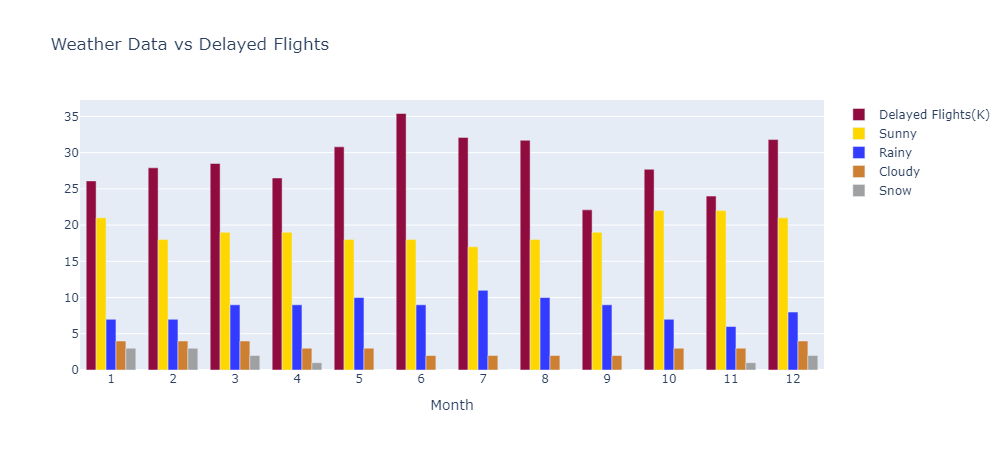

In [176]:
# Plot data to visualize Number of delayed flights per months to monthly weather patterns
trace0 = go.Bar(
                x=weather_delay_patterns['month'],  
                y=weather_delay_patterns['count'],
                name = 'Delayed Flights(K)',
                marker=dict(color='#900C3F') # set the marker color to Gold
                )

trace1 = go.Bar(
                x=weather_delay_patterns['month'],  
                y=weather_delay_patterns['avgDryDays'],
                name = 'Sunny',
                marker=dict(color='#FFD700') # set the marker color to Gold
                )

# trace2 - Rainy
trace2 = go.Bar(
                x=weather_delay_patterns['month'],
                y=weather_delay_patterns['avgRainDays'],
                name='Rainy',
                marker=dict(color='#333BFF') # set the marker color to Blue
                )

# trace3 - Cloudy
trace3 = go.Bar(
                x=weather_delay_patterns['month'],
                y=weather_delay_patterns['avgCloud'],
                name='Cloudy',
                marker=dict(color='#CD7F32') # set the marker color to Bronze
                )

# trace4 - Snow
trace4 = go.Bar(
                x=weather_delay_patterns['month'],
                y=weather_delay_patterns['avgSnowDays'],
                name='Snow',
                marker=dict(color='#9EA0A1') # set the marker color to Silver
                )

# create the data
data = [trace0,trace1, trace2, trace3, trace4]

# create the layout
layout = go.Layout(yaxis={'type': 'linear'},
                   xaxis={'type':'category',
                          'title':'Month'},
                   title='Weather Data vs Delayed Flights')

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

### Compare Distributions for each Weather Pattern

#### Observation == Expection
Delayed flights distribution ==> Uniformly Distributed around June/July

#### Surprisingly No Distributional Correlation
no relationship correlation

Sunny Weather ==> Bimodal Distribution (1 Peaks Between Jan-Mar & 1 Peak Sept-December)

#### Observation == Delayed Flight Distribution
Relationship correlation

Rainy Weather ==> Uniformly Distributed around June/July

#### Observation =/= Delayed Flights Distribution
no relationship correlation

Cloudy Weather ==> Bimodal Distribution (1 Peak Between January/February & 1 Peak October-December)

#### Observation == Delayed Flight Distrution Exactly for each Peak Period
Relationship correlation

Snowy Weather ==> Bimodal Distribution (1Peak between January/February/March & 1 Peak December)

### Plot Early Graph

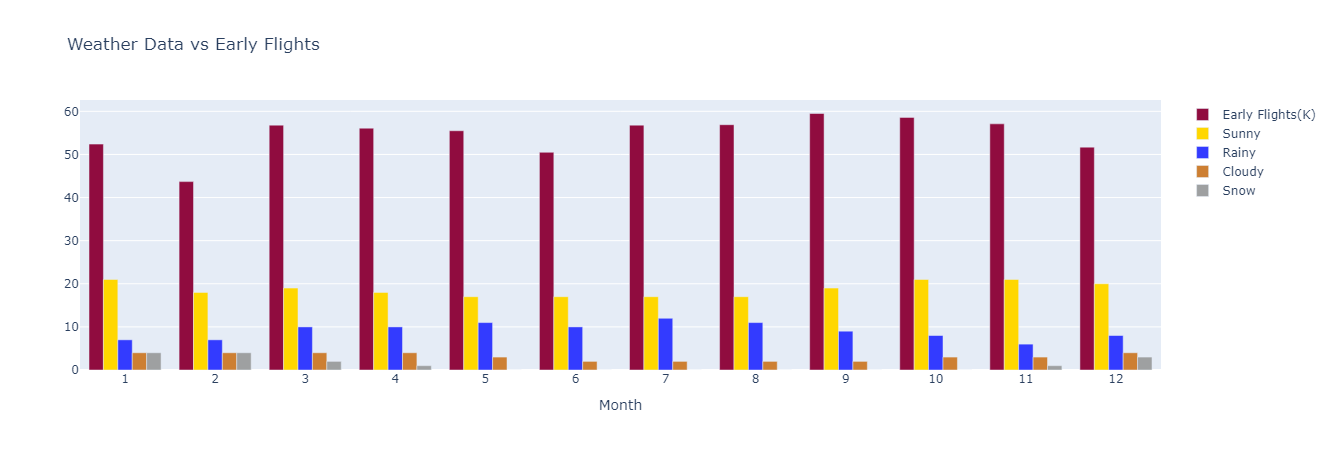

In [177]:
# Plot data to visualize Number of delayed flights per months to monthly weather patterns
trace0 = go.Bar(
                x=weather_early_patterns['month'],  
                y=weather_early_patterns['count'],
                name = 'Early Flights(K)',
                marker=dict(color='#900C3F') # set the marker color to Gold
                )

trace1 = go.Bar(
                x=weather_early_patterns['month'],  
                y=weather_early_patterns['avgDryDays'],
                name = 'Sunny',
                marker=dict(color='#FFD700') # set the marker color to Gold
                )

# trace2 - Rainy
trace2 = go.Bar(
                x=weather_early_patterns['month'],
                y=weather_early_patterns['avgRainDays'],
                name='Rainy',
                marker=dict(color='#333BFF') # set the marker color to Blue
                )

# trace3 - Cloudy
trace3 = go.Bar(
                x=weather_early_patterns['month'],
                y=weather_early_patterns['avgCloud'],
                name='Cloudy',
                marker=dict(color='#CD7F32') # set the marker color to Bronze
                )

# trace4 - Snow
trace4 = go.Bar(
                x=weather_early_patterns['month'],
                y=weather_early_patterns['avgSnowDays'],
                name='Snow',
                marker=dict(color='#9EA0A1') # set the marker color to Silver
                )

# create the data
data = [trace0,trace1, trace2, trace3, trace4]

# create the layout
layout = go.Layout(yaxis={'type': 'linear'},
                   xaxis={'type':'category',
                          'title':'Month'},
                   title='Weather Data vs Early Flights')

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [196]:
# Rename Columns to prevent overlap
weather_early_patterns = weather_early_patterns.rename(columns={'count': 'early_count',
                                       'avgDryDays': 'early_avgDryDays',
                                       'avgRainDays': 'early_avgRainDays', 
                                       'avgCloud': 'early_avgCloud',
                                       'avgSnowDays': 'early_avgSnowDays'})

weather_delay_patterns = weather_delay_patterns.rename(columns={'count': 'delay_count',
                                       'avgDryDays': 'delay_avgDryDays',
                                       'avgRainDays': 'delay_avgRainDays', 
                                       'avgCloud': 'delay_avgCloud',
                                       'avgSnowDays': 'delay_avgSnowDays'})

Total_flight_patterns = pd.merge(weather_early_patterns,weather_delay_patterns, on='month')

In [198]:
Total_flight_patterns.to_csv('Flight_Pattern_Data.csv')

In [179]:
Total_flight_patterns.corr(method ='pearson')

,month,early_count,early_avgDryDays,early_avgRainDays,early_avgCloud,early_avgSnowDays,delay_count,delay_avgDryDays,delay_avgRainDays,delay_avgCloud,delay_avgSnowDays
0,1.0,52.4,21,7,4,4,26.1,21,7,4,3
1,2.0,43.7,18,7,4,4,27.9,18,7,4,3
2,3.0,56.8,19,10,4,2,28.5,19,9,4,2
3,4.0,56.1,18,10,4,1,26.5,19,9,3,1
4,5.0,55.5,17,11,3,0,30.8,18,10,3,0
5,6.0,50.5,17,10,2,0,35.4,18,9,2,0
6,7.0,56.8,17,12,2,0,32.1,17,11,2,0
7,8.0,56.9,17,11,2,0,31.7,18,10,2,0
8,9.0,59.5,19,9,2,0,22.1,19,9,2,0
9,10.0,58.6,21,8,3,0,27.7,22,7,3,0


In [194]:
Total_flight_patterns.shape

(12, 11)

In [1]:
Weather_corr = Total_flight_patterns.corr(method ='pearson')

NameError: name 'Total_flight_patterns' is not defined

In [195]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 1575 objects.
